# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:

# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

units = "imperial"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    units = ["imperial"]
    city_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Note: The Openweathermap api reurned the maximum temperatures in Kelvin scale
        # Hence, the returned maximum temperature values had to be multiplied by the factor 1.8 - 459.67 to convert them to Fahrenheit
        # See : https://stackoverflow.com/questions/25190355/openweathermap-returns-incorrect-current-weather

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] * 1.8 - 459.67
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=['imperial']&appid=16f84dc9439c00c78d79f0709f4a2d18
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol&units=['imperial']&appid=16f84dc9439c00c78d79f0709f4a2d18
Processing Record 2 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=['imperial']&appid=16f84dc9439c00c78d79f0709f4a2d18
Processing Record 3 of Set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?q=georgetown&units=['imperial']&appid=16f84dc9439c00c78d79f0709f4a2d18
Processing Record 4 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?q=terrace&units=['imperial']&appid=16f84dc9439c00c78d79f0709f4a2d18
Processing Record 5 of Set 1 | terrace
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&units=['imperial']&appid=16f84dc9439c00c78d79f0709f4a2d18
Processing Record 6 of Set 1 | mys shmi

In [47]:
city_weather = requests.get(city_url).json()


In [48]:
city_weather

{'coord': {'lon': -71.1828, 'lat': 42.3709},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 273.92,
  'feels_like': 269.24,
  'temp_min': 270.9,
  'temp_max': 276.16,
  'pressure': 1018,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 4.92, 'deg': 0, 'gust': 7.15},
 'clouds': {'all': 0},
 'dt': 1669704976,
 'sys': {'type': 2,
  'id': 2013673,
  'country': 'US',
  'sunrise': 1669722740,
  'sunset': 1669756451},
 'timezone': -18000,
 'id': 4954611,
 'name': 'Watertown',
 'cod': 200}

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ban phai,16.0600,102.7310,84.110,69,99,3.38,TH,1669274135
1,castro,-24.7911,-50.0119,60.440,97,100,2.65,BR,1669274136
2,arraial do cabo,-22.9661,-42.0278,73.418,92,100,8.87,BR,1669274086
3,albany,42.6001,-73.9662,32.306,86,8,0.74,US,1669273964
4,busselton,-33.6500,115.3333,67.064,54,100,4.94,AU,1669274137


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ban phai,16.0600,102.7310,84.110,69,99,3.38,TH,1669274135
1,castro,-24.7911,-50.0119,60.440,97,100,2.65,BR,1669274136
2,arraial do cabo,-22.9661,-42.0278,73.418,92,100,8.87,BR,1669274086
3,albany,42.6001,-73.9662,32.306,86,8,0.74,US,1669273964
4,busselton,-33.6500,115.3333,67.064,54,100,4.94,AU,1669274137


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

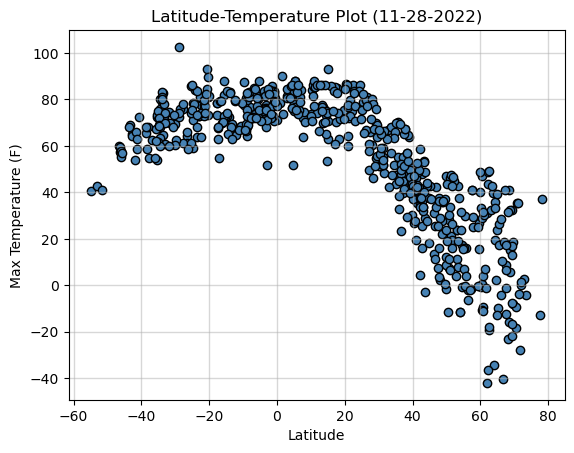

In [51]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.title("Latitude-Temperature Plot (11-28-2022)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

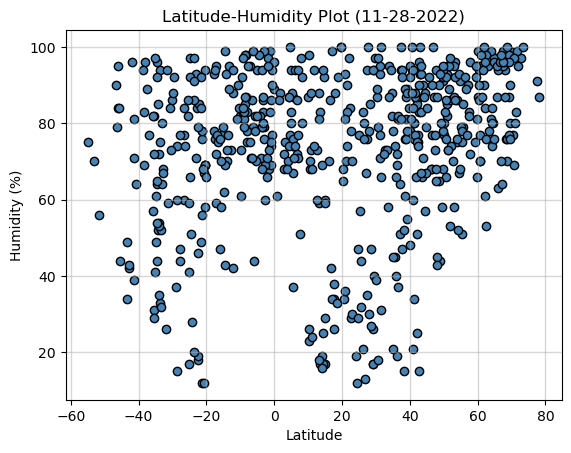

In [52]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.title("Latitude-Humidity Plot (11-28-2022)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

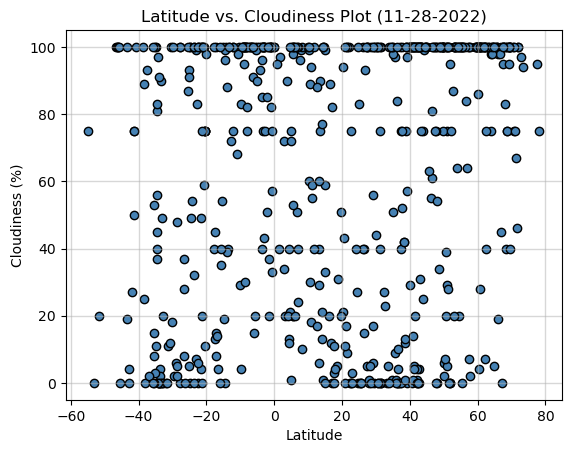

In [53]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.title("Latitude vs. Cloudiness Plot (11-28-2022)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

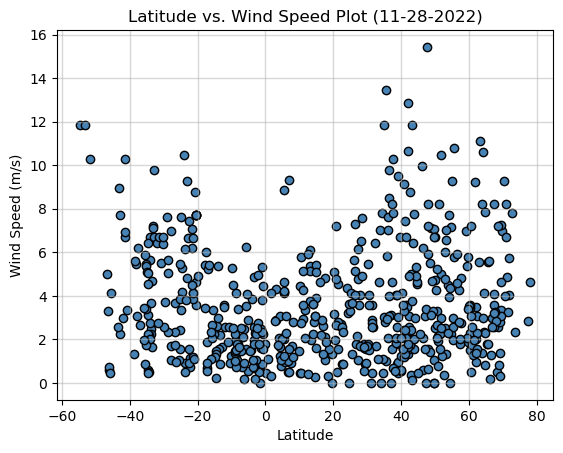

In [54]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.title("Latitude vs. Wind Speed Plot (11-28-2022)")

plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linear_agression(x_values, y_values):
    print(f"The r value is : {round(pearsonr(x_values, y_values)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
   
    line_eq = "y-values = " + str(round(slope, 2)) + "x_values + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a, b), fontsize=15, color="red")
    



In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ponta do sol,32.6667,-17.1000,66.830,73,23,1.70,PT,1669704947
2,lagoa,39.0500,-27.9833,63.968,89,0,9.51,PT,1669704947
3,georgetown,5.4112,100.3354,87.746,74,20,4.12,MY,1669704698
4,terrace,54.5163,-128.6035,17.510,67,20,0.00,CA,1669704778
5,mayo,38.8876,-76.5119,44.978,81,75,2.57,US,1669704948


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,40.658,75,75,11.83,AR,1669704740
6,kieta,-6.2167,155.6333,82.058,79,91,2.48,PG,1669704949
10,rikitea,-23.1203,-134.9692,73.004,71,7,4.84,PF,1669704951
11,olinda,-8.0089,-34.8553,76.730,83,75,2.06,BR,1669704951
12,vao,-22.6667,167.4833,78.872,84,83,6.65,NC,1669704952


###  Temperature vs. Latitude Linear Regression Plot

The r value is : -0.85


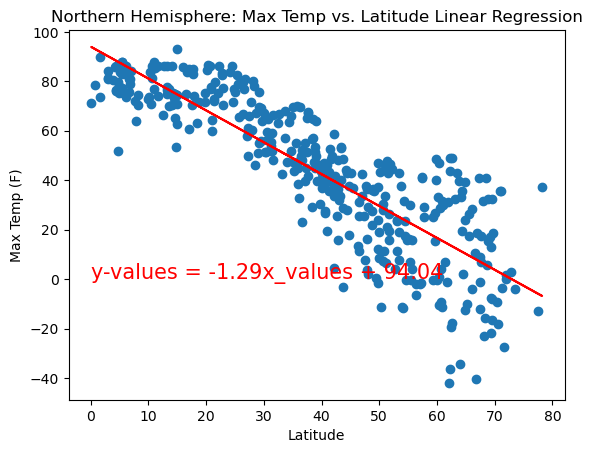

In [62]:
# Linear regression on Northern Hemisphere
# Call a function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call a function #2
annotate(equation, 0, 0)

# Set the title
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(
    "Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


The r value is : 0.51


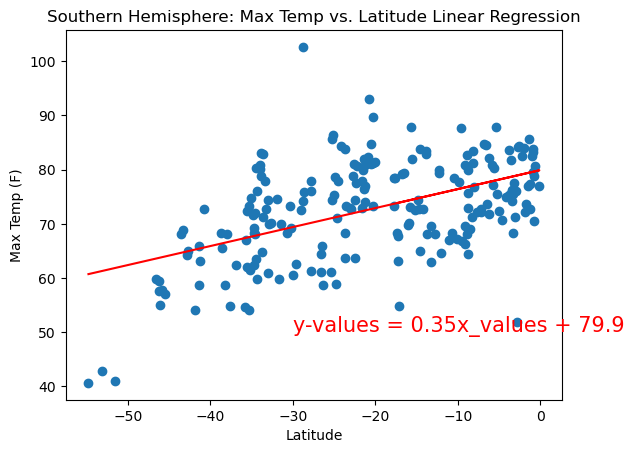

In [63]:
# Linear regression on Southern Hemisphere

# Call a function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Call a function #2
annotate(equation, -30, 50)

# Set the title
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(
    "Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")





**Discussion about the linear relationship:** 
There is a strong negative correlation between latitude and max temperature for northern hemisphere. The high rvalue of -0.85 in the northern hemisphere confirms the strength of the relationship between latitude and max temperature (a strong inverse relationship).
In contrast with the Southern Hemisphere, we observe a relatively moderate positive correlation between the Southern Hemisphere latitude and max. temperature, and the rvalue of 0.51 confirms it.


### Humidity vs. Latitude Linear Regression Plot

The r value is : 0.32


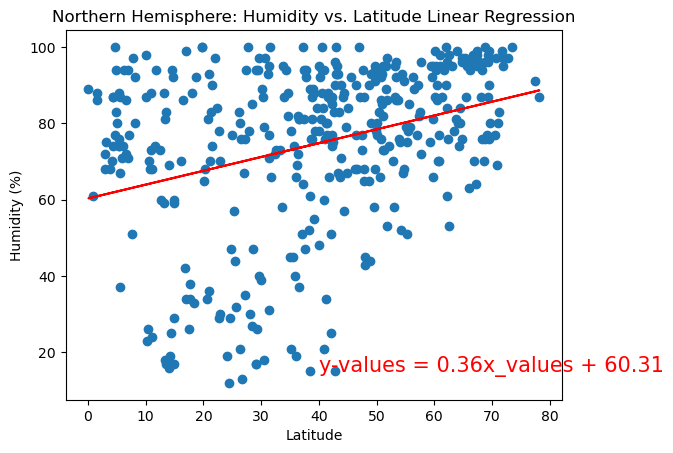

In [64]:
# Northern Hemisphere

# Call a function #1
equation = linear_agression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call a function #2
annotate(equation, 40, 15)

# Set the title
plt.title("Northern Hemisphere: Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(
    "Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r value is : 0.3


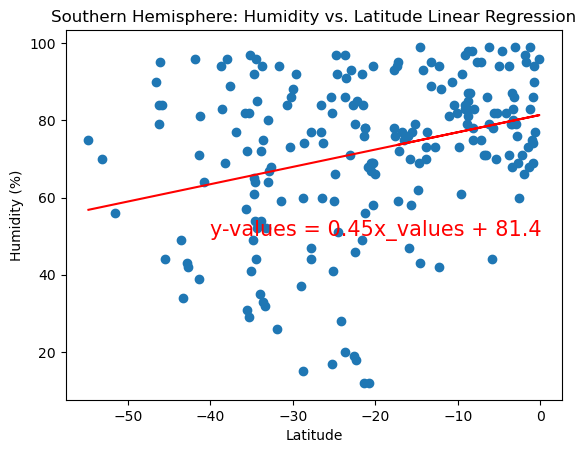

In [65]:
# Southern Hemisphere
# Call a function #1
equation = linear_agression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call a function #2
annotate(equation, -40, 50)

# Set the title
plt.title("Southern Hemisphere: Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(
    "Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")


**Discussion about the linear relationship:** The weak positive correlation depicted by the regression plot between latitude and max humidity for northern hemisphere is also confirmed by the weak rvalue of 0.32 (i.e., the r likely falls within the range of 0.3 ≤ r < 0.5 indicative of a weak correlation). 
In contrast with the Southern Hemisphere, we observe there is none or weak correlation between the Southern Hemisphere latitude and humidity, and the rvalue of 0.30 confirms it (i.e., r is less than 0.3 which is indicative of none or a weak correlation). 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is : 0.28


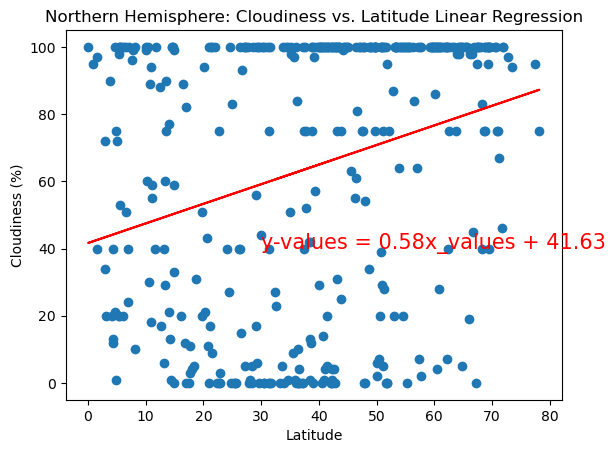

In [66]:
# Northern Hemisphere
# Call a function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call a function #2
annotate(equation, 30, 40)

# Set the title
plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(
    "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")


The r value is : 0.37


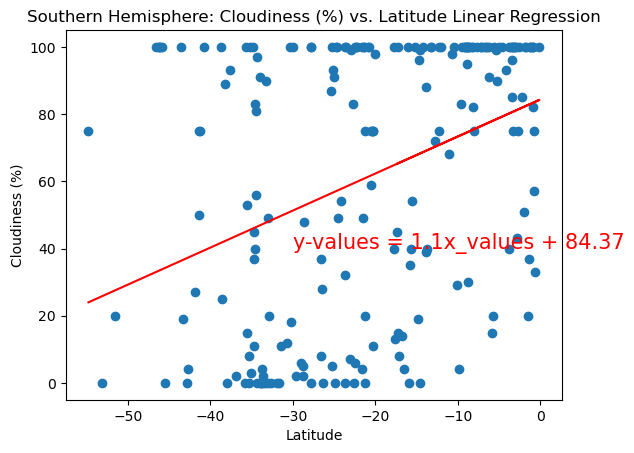

In [67]:
# Southern Hemisphere
# Call a function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call a function #2
annotate(equation, -30, 40)

# Set the title
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(
    "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")


**Discussion about the linear relationship:** There is a weak correlation between the latitude and cloudiness (%) in Northern and Southern Hemispheres. The rvalues also confirm the weak linear relationship between them.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is : 0.17


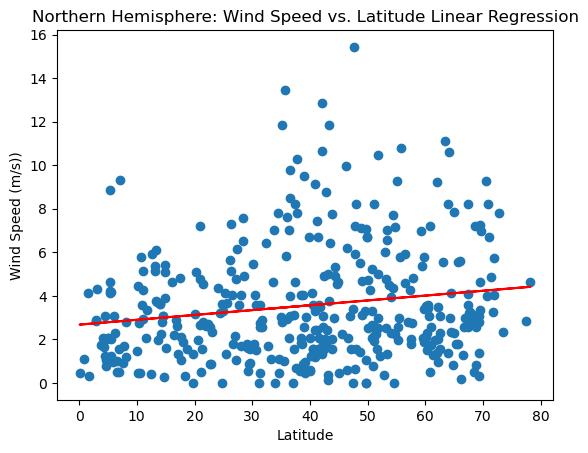

In [68]:
# Northern Hemisphere

# Call a function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call a function #2
annotate(equation, 40, 20)

# Set the title
plt.title("Northern Hemisphere: Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (m/s))")

# Save the figure
plt.savefig(
    "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


The r value is : -0.42


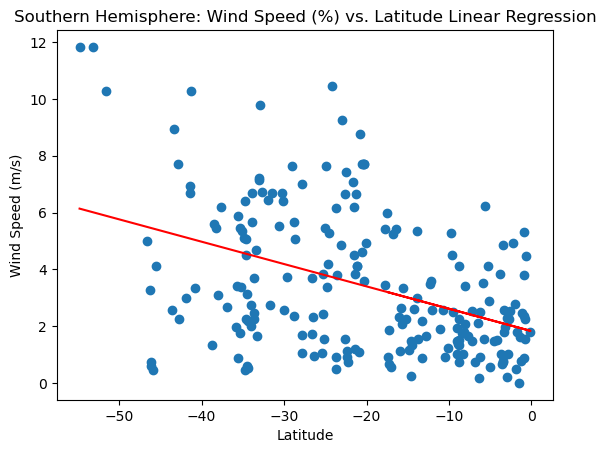

In [69]:
# Southern Hemisphere
# Call a function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call a function #2
annotate(equation, -30, 15)

# Set the title
plt.title("Southern Hemisphere: Wind Speed (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig(
    "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


**Discussion about the linear relationship:** There is a weak positive to no correlation between the latitude and wind speed (%) in Northern Hemisphere with an insignificant rvalue of 0.17 . In contrast, there is a weak negative correlation between latitude and wind speed in the Southern Hemispheres. The rvalue of -0.42 also confirms the the weak linear relationship.